![header](../header.png)

# Guia de Processamento Digital de Imagens em linguagem de programação Python

## Estudo de caso em Reconhecimento Automático de Placas Veiculares

### Descrição

Esse guia é composto de diversos notebooks que têm por principal objetivo apresentar o desenvolvimento de algoritmos em linguagem python com uso da biblioteca de visão computacional OpenCV. Para isso, toma como exemplo um estudo de caso em reconhecimento automático de placas veiculares. As imagens utilizadas são do [SSIG-ALPR Database](http://www.smartsenselab.dcc.ufmg.br/ssig-alpr-database).

### Notebook número 10

Esse notebook tem por objetivo mostrar algumas formas de representar a imagem com base em suas características e descrevê-las.Os esquemas de representação que serão explorados nesse notebook serão:

- Código de cadeia / Contornos / Seguidor ou Rastreamento de Bordas
- Aproximações poligonais

As descrições aqui exploradas serão:

- Perímetro de um contorno
- Cálculo da área de uma região definida por contorno
- Retângulo envolvente

Nesse caso, o primeiro passo a ser dado é a importação das bibliotecas, a definição das funções úteis e a leitura das imagens.

In [20]:
import numpy as np
import cv2
from os import listdir, path
import matplotlib as mpl
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Funcoes uteis 

# Funcao de leitura de imagens
def pdiguide_imgRead(path,convert=True,show=False):
    # Essa funcao cria uma lista de imagens dado o caminho (path) de um diretório.
    # Se "convert" é Verdadeiro, a função irá realizar a conversão das imagens de RGB para Grayscale
    # Se "show" é Verdadeiro, a função irá exibir as imagens carregadas
    
    img = [] # lista de imagens em tons de cinza

    number_of_files = len(listdir(path))#a função listdir forma uma lista com todos os arquivos

    if(show):
        plt.figure(figsize=[15,10]) #define a existencia de uma figura e define o seu tamanho

    #A cada iteração uma imagem é carregada e convertida para tons de cinza, 
    #ao passo que é armazenada nos vetores acima
    for i in range(0,number_of_files): 
        img.append(cv2.imread(path + str(i+1) + '.png'))
        if(convert):
            img[i]=(cv2.cvtColor(img[i],cv2.COLOR_RGB2GRAY))

        #Exibe as imagens
        if(show):
            plt.subplot(1+number_of_files/5,5,i+1)
            plt.imshow(img[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
            #xticks e yticks controlam as escalas exibidas, nesse caso, serão nulas.
            
    print("Leitura finalizada, total de imagens lidas = ",len(img))
    return img #retorna a lista de imagens
    
# Funcao apenas para exibicao da lista de imagens
def pdiguide_show(list_of_imgs, columns, titles=None):
    # Essa funcao exibe as imagens dado uma lista de imagens.
    number_of_files = len(list_of_imgs)
    for i in range(0,number_of_files): 
        plt.subplot(1+number_of_files/columns,columns,i+1) 
        plt.imshow(list_of_imgs[i],cmap='gray'),plt.xticks([]),plt.yticks([]) 
        if titles != None: plt.title(titles[i])
            
# Funcao para calcular e exibir o histograma de uma imagem 
def pdiguide_histogram(img,nbins,show=False):
    # Essa funcao calcula o histograma de um vetor 2D (imagem grayscale)
    # com valores inteiros entre 0-255.
    # Essa imagem retorna um vetor 1D com o histograma e os pontos 
    # que representam o bin_edges para plotagem do histograma.
    # Caso show seja verdadeiro ela mesmo irá plotar o histograma
    h, bin_edges = np.histogram(img.ravel(), nbins,(0,255))
    if show:
        w=256./nbins
        bin_centers = bin_edges[1:]-(w/2)
        plt.bar(bin_centers, h, width=w)
    
    return h, bin_edges

In [3]:
# Leitura das imagens
path = '../Data/'
img = pdiguide_imgRead(path)

Leitura finalizada, total de imagens lidas =  20


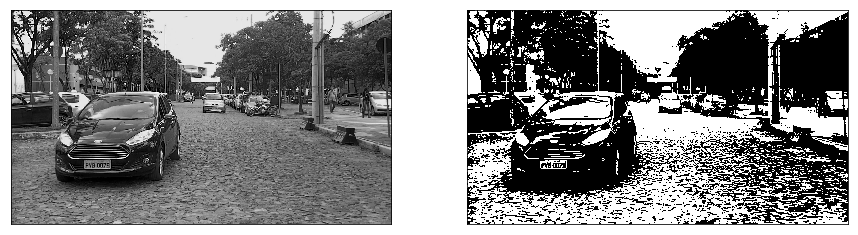

In [9]:
im_car = img[0]

#filtro de suavizacao
car_blur = cv2.blur(im_car,(5,5))

#limiarizacao
_,bin_car = cv2.threshold(car_blur,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)

plt.figure(figsize=[15,10]) 
pdiguide_show([im_car,bin_car],2)

### Representação e Descrição

Após a segmentação objetos podem ser representados em termos de suas características externas (bordas) ou internas (pixels que o compõem). As abordagens de representação de objeto buscam facilitar sua descrição, isto é, extração de características. 

#### Representação por Código em cadeias ou seguidor/rastreamento de bordas/fronteiras ou busca de contornos

Os algoritmos rastreadores de fronteiras ordenam os pixels da bordas de uma região em sentido horário ou anti-horário. Um algoritmo básico para essa técnica é o algoritmo de
rastreamento de fronteira de Moore (1968). Além desse, outros algortimos foram propostos,
por exemplo o de Suzuki et al. (1985) que é utilizado na função do OpenCV apresentada (*cv2.findContours*).

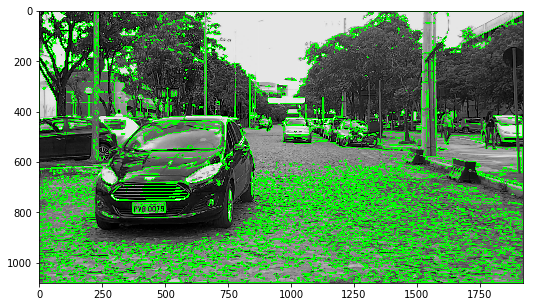

In [37]:
# A função find.Contours() segmenta e representa as bordas de todas as regiões presentes na imagem
# ela recebe tres parametros: o primeiro, é a imagem a ser analisada
# o segundo é o modelo da arvore de hierarquia a ser construida
# o terceiro é o tipo de algoritmo de código em cadeia a ser utilizado
contours,hierarquia = cv2.findContours(bin_car.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

img_cont = cv2.cvtColor(im_car,cv2.COLOR_GRAY2BGR)
# Para desenhar os contornos obtidos utiliza-se a função abaixo
# o indíce -1 indica que todos os contornos serão desenhados, caso fosse um valor i>=0,
# apenas o contorno[i] seria desenhado
# o termo (0,255,0) é um vetor RGB para selecionar a cor do contorno (RED,GREEN,BLUE)
# o termo 5 indica a espessura da linha desenhada
# Consulte a referencia para ver os demais parametros dessa funcao
cv2.drawContours(img_cont, contours, -1, (0,255,0), 2)

plt.figure(figsize=[10,5]) 
plt.imshow(img_cont,cmap='gray')

Da função *cv2.findContours()* observe que no Python uma função pode ter múltiplos retornos. Nesse caso ela retorna um vetor com os contornos obtidos e um vetor com a classe hierarquica desses contornos. A hierarquia é na verdade uma organização em árvore que indica se um contorno é interno ou externo a outro. Quanto mais um contorno é englobado por outros contornos maior será sua hierarquia, ao passo que quanto mais externo o contorno, menor será sua hierarquia. Contornos que englobam outro são chamados de pais e os contornos englobados são chamados de filho. O contorno mai externo, ou seja, aquele que não possui pai receberá um valor de hierarquia 0 e assim por diante.

Outro aspecto relevante, é a grande quantidade de contornos presentes na imagem. Como todo contorno define uma região interna a ele, basta utilizar o Teorema de Green e obter sua área. A partir da área posso filtrar os contornos para desenhar apenas os top 10 maiores contornos. O OpenCV facilita essa operação a partir do uso da função *cv2.contourArea()*.

#### Descritor de regiões: Área

A área pode ser expressa como o número de pixels que compreende o objeto ou a região de interesse. 

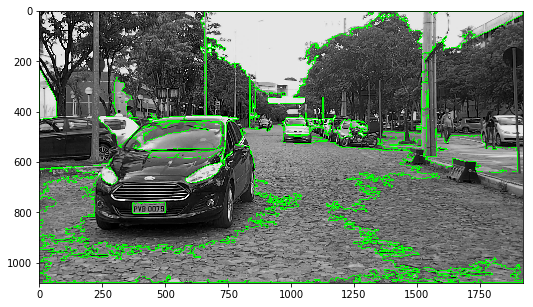

In [69]:
#filtrando os contornos calculados anteriormente
#usa-se o sorted para organizar com base na area calculada 
#pelo cv2.contourArea
#essa organizacao é feita no sentido reverso, isto é, do maior
#para o menor
cnts = sorted(contours, key = cv2.contourArea, reverse = True)[:10] #seleciona-se os 10 maiores contornos

img_cont_filter = cv2.cvtColor(im_car,cv2.COLOR_GRAY2BGR)
cv2.drawContours(img_cont_filter, cnts, -1, (0,255,0), 2)

plt.figure(figsize=[10,5]) 
plt.imshow(img_cont_filter,cmap='gray')

Observe que se nossa intenção é segmentar a placa, nosso algoritmo esta se aproximando do resultado. Sendo assim, podemos tentar capturar os contornos que possuem formato de quadrilátero. Assim, utilizaremos a aproximação poligonal para aproximar o contorno ao poligono que mais se assemelha com ele.

#### Representação por Aproximação polígonal

Em muitas situações as bordas obtidas não coincidem com o formato do objeto. O
principal objetivo da aproximação poligonal é capturar a essência da forma da borda com
o menor número possível de segmentos poligonais. Para isso existem diversas técnicas que
podem ser computacionalmente bem custosas (PEDRINI; SCHWARTZ, 2008). Para definir a melhor aproximação,
costuma-se utilizar extrair o perímetro de um contorno e utilizar esse descritor como parametro da aproximação.

#### Descritor de borda: Perímetro

O perímetro representa o comprimento da borda de um objeto. Uma aproximação simples para este descritor pode ser obtida pela contagem dos pixels ao longo da borda do objeto na imagem.

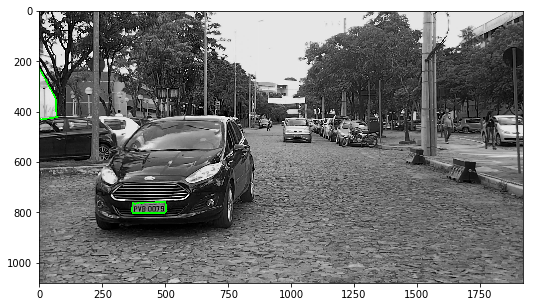

In [79]:
img_cont_aprox = cv2.cvtColor(im_car,cv2.COLOR_GRAY2BGR)

for index in range(0,len(cnts)):
    epsilon = 0.02*cv2.arcLength(cnts[index],True) # epsilon é o parametro que determina 
                                                   # a acuracia da aproximacao
                                                   # sendo proporcional ao perímetro do contorno
                                                   # calculado pela cv2.arcLength()
    # Função de aproximacao poligonal
    # Sua saida são os vertices do poligono aproximado
    approx = cv2.approxPolyDP(cnts[index],epsilon,True)
    
    # Se o comprimento total de approx for 4, significa que possui 4 vertices, sendo um quadriatero
    if(len(approx) == 4):
        cv2.drawContours(img_cont_aprox, cnts, index, (0,255,0), 6)

plt.figure(figsize=[10,5]) 
plt.imshow(img_cont_aprox,cmap='gray')    

Conseguimos reduzir para dois contornos candidatos a placa. Uma distinção usual para esse estudo caso é a utilização da relação entre a altura da placa e o seu comprimento. A razão altura por comprimento de um retângulo é denominada *Aspect Ratio*. Para as placas brasileiras é de 0,325* logo podemos utilizar esse valor como referência na hora de setar nosso limiares.

*Obs*: Esse valor de *AR* foi considerado tomando as placas de dimensões 400mmx130mm anteriores as placas do MercoSul.  

Mas, como podemos calcular o *AR* de regiões não retangulares? Para isso faremos uso da abordagem de descrição do retângulo envolvente. 

#### Retângulo envolvente

O retângulo envolvente de um objeto dimensional corresponde ao retângulo de dimensões mínimas que engloba o objeto, cujos lados são paralelos aos eixos principais (menor e maior) do objeto. O cálculo da área de um objeto pode ser simplificado por meio desse descritor.

Idealmente, para se extrair o retângulo envolvente de um contorno utilizamos a função *cv2.minAreaRect(cnt)*
que nos retorna um retângulo com (centro(x,y), (comprimento, altura), ângulo de rotação).

Entrentanto, em alguns casos apenas traçar um retângulo sobre o contorno que não considere sua rotação já é o suficiente. Nesse caso basta usar a função *cv2.boundingRect()* que retornará um retângulo conhecido como caixa delimitadora ou *bounding box*.

Para demonstração vamos utilizar as duas funções. 

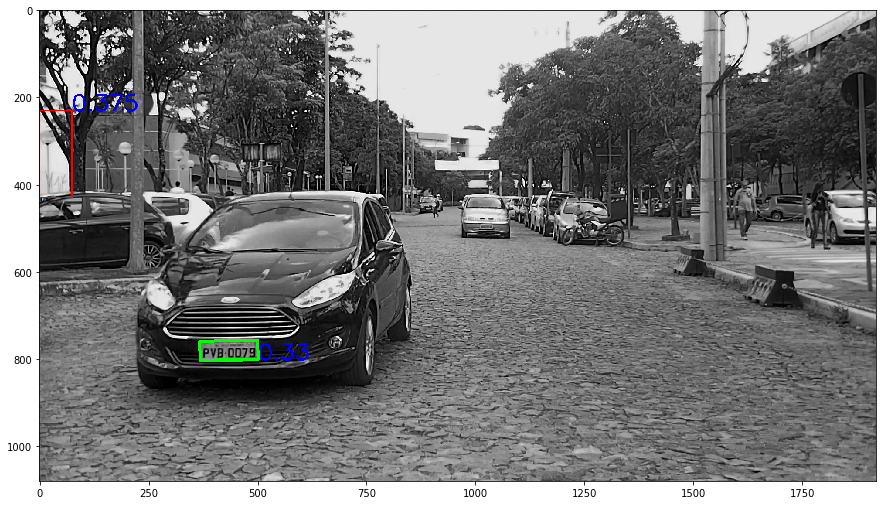

In [104]:
img_cont_rect = cv2.cvtColor(im_car,cv2.COLOR_GRAY2BGR)

for index in range(0,len(cnts)):
    epsilon = 0.02*cv2.arcLength(cnts[index],True)
    approx = cv2.approxPolyDP(cnts[index],epsilon,True)
    
    if(len(approx) == 4):
        rect = cv2.minAreaRect(cnts[index]) # determina o retangulo envolvente
        
        ar = rect[1][1]/rect[1][0] # rect[1] corresponde ao par (comprimento,altura),
                                   # logo rect[1][1] é a altura e rect[1][0] o comprimento 
        # funcoes que permitem o desenho do retangulo
        box = cv2.boxPoints(rect) #converte o rect para o foramto de 4 pontos
        box = np.int0(box) #normaliza para inteiros positivos
        cv2.drawContours(img_cont_rect,[box],0,(255,0,0),2) 
        # para facilitar podemos escrever os AR arredondados na imagem
        cv2.putText(img_cont_rect,str(round(ar, 3)),(box[3][0],box[3][1]),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.7, (0,0,255), 4)
        #filtragem por Aspect Ratio       
        if(ar >= 0.3 and ar <= 0.35): 
            cv2.drawContours(img_cont_rect,[box],0,(0,255,0),5)

plt.figure(figsize=[15,10]) 
plt.imshow(img_cont_rect,cmap='gray')  

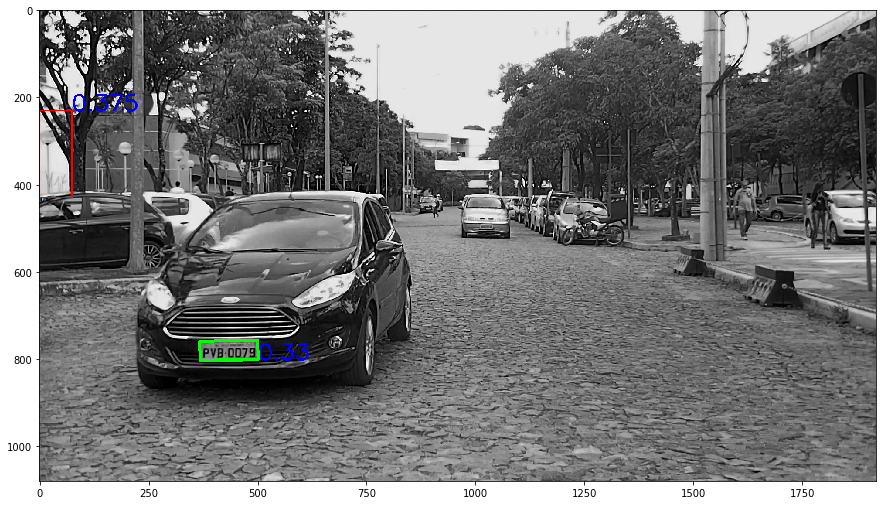

In [106]:
img_cont_bbox = cv2.cvtColor(im_car,cv2.COLOR_GRAY2BGR)

for index in range(0,len(cnts)):
    epsilon = 0.02*cv2.arcLength(cnts[index],True)
    approx = cv2.approxPolyDP(cnts[index],epsilon,True)
    
    if(len(approx) == 4):
        x,y,w,h = cv2.boundingRect(cnts[index]) #cria um retangulo em torno do contorno
        cv2.rectangle(img_cont_bbox,(x,y),(x+w,y+h),(255,0,0),2) #desenha na imagem
        ar = h/w 
        cv2.putText(img_cont_bbox,str(round(ar, 3)),(box[3][0],box[3][1]),
                    cv2.FONT_HERSHEY_SIMPLEX, 1.7, (0,0,255), 4)
        if(ar >= 0.3 and ar <= 0.35):
            cv2.rectangle(img_cont_bbox,(x,y),(x+w,y+h),(0,255,0),5)

plt.figure(figsize=[15,10]) 
plt.imshow(img_cont_rect,cmap='gray') 

Através do *Aspect Ratio* conseguimos localizar a placa utilizando uma série de descritores e representações. Entretanto, essa característica é bem restrita e específica o que diminui a robustez do algoritmo e faz com que ele não detecte placas de moto ou ainda não esteja pronto para novos formatos de placa que possam surgir.

Avalie se esse algoritmo funciona bem para as 20 imagens disponíveis.

### Referências